# 📝 Exercise M6.02

The aim of this exercise it to explore some attributes available in
scikit-learn's random forest.

First, we will fit the penguins regression dataset.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

penguins = pd.read_csv("../datasets/penguins_regression.csv")
feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data, target = penguins[[feature_name]], penguins[target_name]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0)

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

Create a random forest containing three trees. Train the forest and
check the generalization performance on the testing set in terms of mean
absolute error.

In [5]:
# Write your code here.
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=3,n_jobs=2)
forest.fit(data_train, target_train)

RandomForestRegressor(n_estimators=3, n_jobs=2)

In [7]:
from sklearn.metrics import mean_absolute_error
target_predicted = forest.predict(data_test)
error = mean_absolute_error(target_test, target_predicted)
print(f"Mean absolute error is: {error:.3f}")

Mean absolute error is: 349.940


The next steps of this exercise are to:

- create a new dataset containing the penguins with a flipper length
  between 170 mm and 230 mm;
- plot the training data using a scatter plot;
- plot the decision of each individual tree by predicting on the newly
  created dataset;
- plot the decision of the random forest using this newly created dataset.

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p class="last">The trees contained in the forest that you created can be accessed
with the attribute <tt class="docutils literal">estimators_</tt>.</p>
</div>

In [29]:
# Write your code here.
penguins.describe()

,Flipper Length (mm),Body Mass (g)
count,342.000000,342.000000
mean,200.915205,4201.754386
std,14.061714,801.954536
min,172.000000,2700.000000
25%,190.000000,3550.000000
50%,197.000000,4050.000000
75%,213.000000,4750.000000
max,231.000000,6300.000000


In [19]:
penguins_min = penguins[penguins[feature_name]>=170.0]

In [22]:
penguins_min_max = penguins_min[penguins_min[feature_name]<=230.0]

In [24]:
penguins_min_max.min()

Flipper Length (mm)     172.0
Body Mass (g)          2700.0
dtype: float64

In [30]:
data, target = penguins_min_max[[feature_name]], penguins_min_max[target_name]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0)

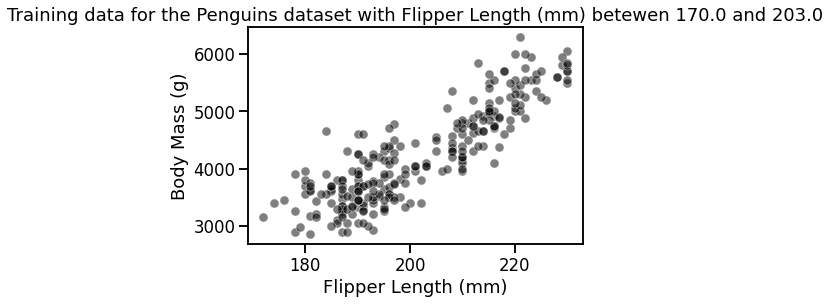

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=data_train[feature_name], y=target_train, color="black",
                alpha=0.5)

_ = plt.title(f"Training data for the Penguins dataset with {feature_name} between 170.0 and 203.0")

In [ ]:
forest.fit(data_train, target_train)
